In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score , ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

from sklearn import metrics

%matplotlib inline

In [151]:
!pip install fastapi

   ---------------------------------------- 0.0/93.2 kB ? eta -:--:--
   ----------------- ---------------------- 41.0/93.2 kB ? eta -:--:--
   ----------------- ---------------------- 41.0/93.2 kB ? eta -:--:--
   ----------------- ---------------------- 41.0/93.2 kB ? eta -:--:--
   ----------------- ---------------------- 41.0/93.2 kB ? eta -:--:--
   ---------------------------------------- 93.2/93.2 kB 378.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/72.0 kB ? eta -:--:--
   ---------------------------------------- 72.0/72.0 kB 2.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Load the Data

In [3]:
df = pd.read_csv(r"C:\Users\almal\Desktop\cleaned_dataset_A.csv")

In [5]:
df

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,Defender Centre-Back,186.000000,21.0,34,0.000000,0.000000,0.130529,0.0,0.000000,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
1,Manchester United,midfield-CentralMidfield,181.000000,20.0,39,0.129125,0.064562,0.225968,0.0,0.000000,0.000000,0.000000,2788,0,0,1,800000,800000,3,0
2,Manchester United,midfield-CentralMidfield,175.000000,18.0,51,0.153759,0.102506,0.000000,0.0,0.000000,0.000000,0.000000,3512,0,0,1,800000,800000,3,0
3,Leicester City,Goalkeeper,191.000000,25.0,65,0.000000,0.000000,0.015340,0.0,0.000000,1.257883,0.291461,5867,0,0,0,2000000,2000000,1,0
4,Leicester City,Goalkeeper,189.000000,33.0,31,0.000000,0.000000,0.064516,0.0,0.000000,1.483871,0.161290,2790,89,14,0,600000,3500000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,Western Sydney Wanderers,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
5731,Western Sydney Wanderers,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
5732,Western Sydney Wanderers,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.000000,0.000000,960,0,0,0,50000,50000,4,0
5733,Western Sydney Wanderers,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.000000,0.000000,865,0,0,0,50000,50000,4,0


# Preprocess the Data

In [8]:
# Drop the 'position_encoded' column because there is another column with the same meaning
df.drop(['position_encoded'], axis=1, inplace=True)

# Keeping the original 'position' column intact for further encoding steps

In [10]:
df

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,winger
0,Manchester United,Defender Centre-Back,186.000000,21.0,34,0.000000,0.000000,0.130529,0.0,0.000000,0.000000,0.000000,2758,47,13,0,2000000,2000000,0
1,Manchester United,midfield-CentralMidfield,181.000000,20.0,39,0.129125,0.064562,0.225968,0.0,0.000000,0.000000,0.000000,2788,0,0,1,800000,800000,0
2,Manchester United,midfield-CentralMidfield,175.000000,18.0,51,0.153759,0.102506,0.000000,0.0,0.000000,0.000000,0.000000,3512,0,0,1,800000,800000,0
3,Leicester City,Goalkeeper,191.000000,25.0,65,0.000000,0.000000,0.015340,0.0,0.000000,1.257883,0.291461,5867,0,0,0,2000000,2000000,0
4,Leicester City,Goalkeeper,189.000000,33.0,31,0.000000,0.000000,0.064516,0.0,0.000000,1.483871,0.161290,2790,89,14,0,600000,3500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,Western Sydney Wanderers,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.000000,0.000000,1023,0,0,0,75000,75000,1
5731,Western Sydney Wanderers,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.000000,0.000000,1449,102,18,0,300000,300000,0
5732,Western Sydney Wanderers,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.000000,0.000000,960,0,0,0,50000,50000,0
5733,Western Sydney Wanderers,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.000000,0.000000,865,0,0,0,50000,50000,0


In [12]:
# Split all features into categorical and numeric
categorical_features = ['team','position']
numeric_features = ['height' , 'age','appearance','goals','assists','yellow cards','second yellow cards','red cards','goals conceded','clean sheets','minutes played','days_injured','games_injured',
                    'award','current_value','highest_value','winger']

In [14]:
# one hot encoding for categorical_features
df = pd.get_dummies(df, columns = categorical_features, drop_first=True)

In [16]:
# Define a threshold for binary classification by using the median
threshold = df['current_value'].median()

# Function to categorize into binary classes: Low or High
def categorize_values_binary(value):
    if value <= threshold:
        return 'Low'
    else:
        return 'High'

# Apply the function to create a new binary classification column
df['current_value_category'] = df['current_value'].apply(categorize_values_binary)

# Drop the original 'current_value' column as it's no longer needed
df.drop('current_value', axis=1, inplace=True)

# Check the distribution of the new binary categories
print(df['current_value_category'].value_counts())


current_value_category
Low     3112
High    2623
Name: count, dtype: int64


In [18]:
df.shape

(5735, 387)

In [20]:
encoder = LabelEncoder()
df['current_value_category_encoded'] = encoder.fit_transform(df['current_value_category']) 

In [22]:
df.drop('current_value_category', axis=1, inplace=True)

# Feature selection

In [25]:
correlation = df.corr(numeric_only=True)
print(correlation['current_value_category_encoded'].sort_values(ascending=False))

current_value_category_encoded    1.000000
position_Goalkeeper               0.165113
goals conceded                    0.115830
position_midfield                 0.091985
team_Richards Bay FC              0.062908
                                    ...   
games_injured                    -0.189400
assists                          -0.240275
minutes played                   -0.383475
appearance                       -0.390704
highest_value                    -0.628608
Name: current_value_category_encoded, Length: 387, dtype: float64


In [29]:
threshold = 0.10 

selected_features = correlation[abs(correlation['current_value_category_encoded']) > threshold]['current_value_category_encoded'].index
selected_features

Index(['appearance', 'goals', 'assists', 'goals conceded', 'minutes played',
       'days_injured', 'games_injured', 'award', 'highest_value',
       'position_Goalkeeper', 'current_value_category_encoded'],
      dtype='object')

In [31]:
selected_features = ['appearance', 'goals', 'assists', 'goals conceded', 'minutes played',
       'days_injured', 'games_injured', 'award', 'highest_value',
       'position_Goalkeeper', 'current_value_category_encoded']

In [33]:
df = df[selected_features]
df.head()

,appearance,goals,assists,goals conceded,minutes played,days_injured,games_injured,award,highest_value,position_Goalkeeper,current_value_category_encoded
0,34,0.000000,0.000000,0.000000,2758,47,13,0,2000000,False,0
1,39,0.129125,0.064562,0.000000,2788,0,0,1,800000,False,0
2,51,0.153759,0.102506,0.000000,3512,0,0,1,800000,False,0
3,65,0.000000,0.000000,1.257883,5867,0,0,0,2000000,True,0
4,31,0.000000,0.000000,1.483871,2790,89,14,0,3500000,True,0


In [86]:
# Prepare data
X = df.drop(['current_value_category_encoded'], axis=1)
y = df['current_value_category_encoded']

# Split data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [88]:
X.iloc[0,:].values

array([34, 0.0, 0.0, 0.0, 2758, 47, 13, 0, 2000000, False], dtype=object)

In [90]:
dict_f = {'appearance': 34,
          'goals': 0.0,
          'assists':0.0, 
          'goals conceded': 0.0,
          'minutes played': 2758 ,
          'days_injured': 47,
          'games_injured': 13 ,
          'award': 0,
          'highest_value':2000000,
          'position_Goalkeeper':False
             }
scaler.transform(np.array([list(dict_f.values())]))

array([[ 0.2157792 , -0.67546964, -0.70916001, -0.3146138 ,  0.45258797,
         0.02455782,  0.77337129, -0.66611578,  0.59562416, -0.40262563]])

In [92]:
np.array([list(dict_f.values())])

array([[3.400e+01, 0.000e+00, 0.000e+00, 0.000e+00, 2.758e+03, 4.700e+01,
        1.300e+01, 0.000e+00, 2.000e+06, 0.000e+00]])

In [94]:
from fastapi.encoders import jsonable_encoder
json_compatible_data = jsonable_encoder(dict_f)

In [96]:
json_compatible_data

{'appearance': 34,
 'goals': 0.0,
 'assists': 0.0,
 'goals conceded': 0.0,
 'minutes played': 2758,
 'days_injured': 47,
 'games_injured': 13,
 'award': 0,
 'highest_value': 2000000,
 'position_Goalkeeper': False}

# Build the Model

In [99]:
model = KNeighborsClassifier()

In [101]:
param_grid = {
    'n_neighbors': [2, 3, 4, 5, 6, 7]
}
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

# Train the Decision Tree

In [104]:
# Fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7]}, scoring='f1_macro',
             verbose=1)

In [106]:
grid_search.best_params_

{'n_neighbors': 6}

In [108]:
model = grid_search.best_estimator_

# Test the model

In [111]:
y_pred = model.predict(X_test_scaled) 

# Evaluating the Model 

In [114]:
base_model = round(df['current_value_category_encoded'].value_counts()[1]/df.shape[0]*100, 2)
base_model

54.26

In [116]:
# Calculate accuracy on testing
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8291194420226679

In [118]:
# Calculate accuracy on training
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.8788142981691369

In [119]:
# The difference in accuracy between the training and test sets indicates that the model may be overfitting. 

In [122]:
# Calculate precision
precision = precision_score(y_test, y_pred, average='macro')
precision

0.8291603577965473

In [124]:
# Calculate recall
recall = recall_score(y_test, y_pred, average='macro')
recall

0.832049748497117

In [126]:
# Calculate F1 score
F1 = f1_score(y_test, y_pred, average='macro')
F1

0.8287538086532602

In [128]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[449,  71],
       [125, 502]], dtype=int64)

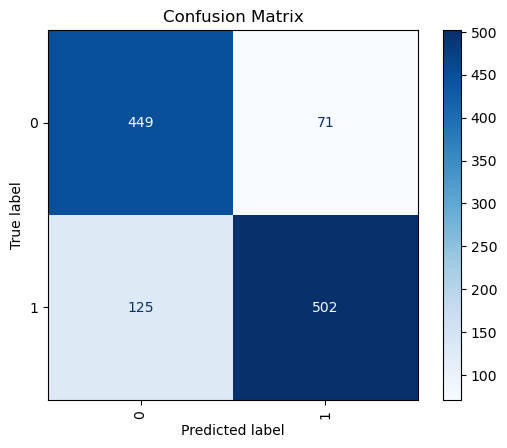

In [130]:
# Heatmap for the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       520
           1       0.88      0.80      0.84       627

    accuracy                           0.83      1147
   macro avg       0.83      0.83      0.83      1147
weighted avg       0.83      0.83      0.83      1147

